<a href="https://colab.research.google.com/github/bulbulbirdee/GYMHA/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
!pip install jsonlines
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[
    0:200,
]
data.head()

Saving Resume.csv to Resume.csv


,ID,Resume_str,Resume_html,Category
1974,38946032,CONSTRUCTION ACCOUNTANT - CONTRACTOR ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION
1399,21511817,EXECUTIVE CHEF Summary ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
2129,13915715,ASSISTANT COMPANY SECRETARY Sum...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS
297,83816738,INFORMATION TECHNOLOGY INTERN (TEST A...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
213,67645662,OSP ENGINEERING DESIGNER Ex...,"<div class=""MPR skn-cbg1 fontsize fontface vma...",DESIGNER


In [6]:
!pip install spacy
!python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "jz_skill_patterns.jsonl"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names


['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [9]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [10]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

In [11]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
1974,38946032,CONSTRUCTION ACCOUNTANT - CONTRACTOR ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,construction accountant contractor professiona...,"[workflow, certificate, finance, workload, acc..."
1399,21511817,EXECUTIVE CHEF Summary ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,executive chef summary executive chef two year...,[chef]
2129,13915715,ASSISTANT COMPANY SECRETARY Sum...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS,assistant company secretary summary reliable l...,[]
297,83816738,INFORMATION TECHNOLOGY INTERN (TEST A...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology intern test automation ...,"[web service, component, spring, monitoring, a..."
213,67645662,OSP ENGINEERING DESIGNER Ex...,"<div class=""MPR skn-cbg1 fontsize fontface vma...",DESIGNER,osp engineering designer experience osp engine...,"[engineering, residual, design, data system, s..."


In [12]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [15]:
Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")
Job_cat


array(['CONSTRUCTION', 'CHEF', 'PUBLIC-RELATIONS',
       'INFORMATION-TECHNOLOGY', 'DESIGNER', 'FITNESS', 'BANKING',
       'CONSULTANT', 'ENGINEERING', 'APPAREL', 'HR', 'BPO', 'ACCOUNTANT',
       'AVIATION', 'FINANCE', 'DIGITAL-MEDIA', 'ARTS', 'TEACHER',
       'AUTOMOBILE', 'HEALTHCARE', 'ADVOCATE', 'SALES', 'AGRICULTURE',
       'BUSINESS-DEVELOPMENT', 'ALL'], dtype=object)

In [41]:
Job_Category = 'INFORMATION-TECHNOLOGY'
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Most Used Words in INFORMATION-TECHNOLOGY Resume')

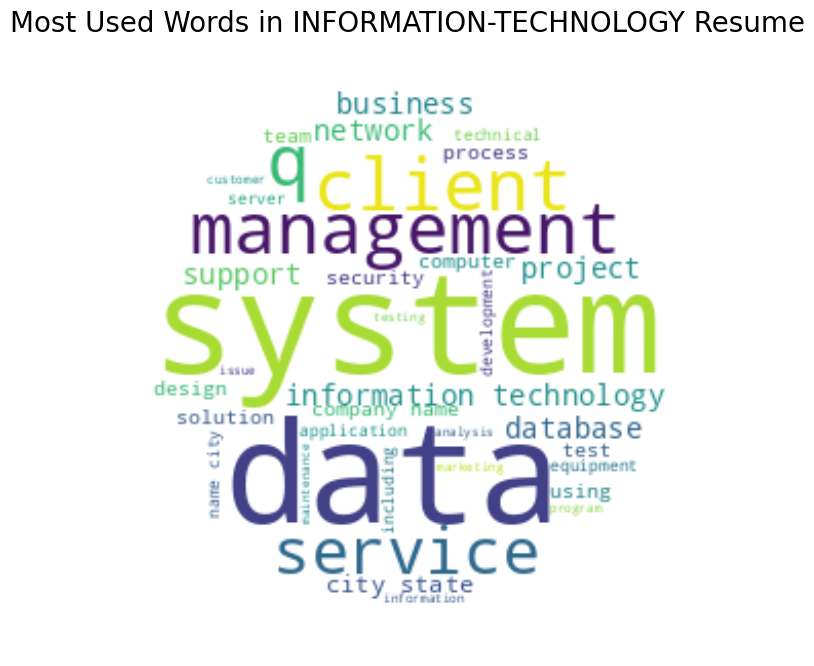

In [42]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [18]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

In [24]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [25]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [26]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [27]:

sent2 = 'Abid Ali Awan Data Scientist I am a certified data scientist professional, who loves building machine learning models and blogs about the latest AI technologies. I am currently testing AI Products at PEC-PITC, which later gets approved for human trials. abidaliawan@tutamail.com +923456855126 Islamabad, Pakistan abidaliawan.me WORK EXPERIENCE Data Scientist Pakistan Innovation and Testing Center - PEC 04/2021 - Present, Islamabad, Pakistan Redesigned data of engineers that were mostly scattered and unavailable. Designed dashboard and data analysis report to help higher management make better decisions. Accessibility of key information has created a new culture of making data-driven decisions. Contact: Ali Raza Asif - darkslayerraza10@gmail.com Data Scientist Freelancing/Kaggle 11/2020 - Present, Islamabad, Pakistan Engineered a healthcare system. Used machine learning to detect some of the common decisions. The project has paved the way for others to use new techniques to get better results. Participated in Kaggle machine learning competitions. Learned new techniques to get a better score and finally got to 1 percent rank. Researcher / Event Organizer CREDIT 02/2017 - 07/2017, Kuala Lumpur, Malaysia Marketing for newly build research lab. Organized technical events and successfully invited the multiple companys CEO for talks. Reduced the gap between industries and educational institutes. Research on new development in the IoT sector. Created research proposal for funding. Investigated the new communication protocol for IoT devices. Contact: Dr. Tan Chye Cheah - dr.chyecheah.t@apu.edu.my EDUCATION MSc in Technology Management Staffordshire University 11/2015 - 04/2017, Postgraduate with Distinction Challenges in Implementing IoT-enabled Smart cities in Malaysia. Bachelors Electrical Telecommunication Engineering COMSATS Institute of Information Technology, Islamabad 08/2010 - 01/2014, CGPA: 3.09 Networking Satellite communications Programming/ Matlab Telecommunication Engineering SKILLS Designing Leadership Media/Marketing R/Python SQL Tableau NLP Data Analysis Machine learning Deep learning Webapp/Cloud Feature Engineering Ensembling Time Series Technology Management ACHIEVEMENTS 98th Hungry Geese Simulation Competition (08/2021) 2nd in Covid-19 vaccinations around the world (07/2021) 8th in Automatic Speech Recognition in WOLOF (06/2021) Top 10 in WiDS Datathon. (03/2021) 40th / 622 in MagNet: Model the Geomagnetic Field Hosted by NOAA (02/2021) 18th in Rock, Paper, Scissors/Designing AI Agent Competition. (02/2021) PROJECTS Goodreads Profile Analysis WebApp (09/2021) Data Analysis Web Scraping XLM Interactive Visualization Contributed in orchest.io (08/2021) Testing and Debuging Technical Article Proposing new was to Improve ML pipelines World Vaccine Update System (06/2021) Used sqlite3 for database Automated system for daily update the Kaggle DB and Analysis Interactive dashboard mRNA-Vaccine-Degradation-Prediction (06/2021) Explore our dataset and then preprocessed sequence, structure, and predicted loop type features Train deep learning GRU model Trip Advisor Data Analysis/ML (04/2021) Preprocessing Data, Exploratory Data analysis, Word clouds. Feature Engineering, Text processing. BiLSTM Model for predicting rating, evaluation, model performance. Jane Street Market Prediction (03/2021) EDA, Feature Engineering, experimenting with hyperparameters. Ensembling: Resnet, NN Embeddings, TF Simple NN model. Using simple MLP pytorch model. Achievements/Tasks Achievements/Tasks Achievements/Tasks Thesis Courses'
doc = nlp(sent2)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [28]:
input_skills = 'hineData Science,Data Analysis,Database,SQL,Mac Learning,tableau'

req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(sent2.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 66.7% matched to your requirements


In [39]:
docs = data["Clean_Resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 4
ldamodel = lda(
    bow,
    num_topics=num_topics,
    id2word=dictionary,
    passes=50,
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.011*"state" + 0.010*"company" + 0.009*"city" + 0.007*"management" + 0.007*"name" + 0.007*"employee" + 0.006*"skill" + 0.006*"customer" + 0.005*"service" + 0.005*"program"'),
 (1,
  '0.009*"system" + 0.008*"management" + 0.007*"state" + 0.007*"support" + 0.006*"city" + 0.006*"project" + 0.006*"software" + 0.006*"company" + 0.005*"technology" + 0.005*"network"'),
 (2,
  '0.011*"customer" + 0.009*"state" + 0.009*"service" + 0.008*"company" + 0.007*"city" + 0.007*"food" + 0.006*"name" + 0.006*"skill" + 0.006*"accounting" + 0.005*"account"'),
 (3,
  '0.012*"company" + 0.011*"city" + 0.011*"state" + 0.011*"sale" + 0.009*"name" + 0.008*"marketing" + 0.007*"business" + 0.007*"client" + 0.007*"management" + 0.007*"new"')]

In [33]:
!pip show pyLDAvis

#import pyLDAvis.gensim_models
#pyLDAvis.enable_notebook()
#pyLDAvis.gensim_models.prepare(ldamodel, bow, dictionary)



In [34]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [35]:
from pyLDAvis import gensim_models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: name 'corpus' is not defined